# Voter Registration in the United States
The purpose of this project is to analyze how trend in voter registration in the United States of America. The goal is to ultimately answer the two following research question listed below:
1. What state had the highest amount of registered voters?
2. Which month did North Carolina see the highest amount of registered voters?

These questions each answer an aspect of dataframe involving national trends as well as a state trend. The importance of this research comes from the significant impact registered voters make in the US when choosing future elected official.

In [1]:
import  pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

We will use the following dataframe and assign it to a variable in order to base our research conslusions off of it.

In [2]:
voters = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/voter-registration/new-voter-registrations.csv")

We will now present the basic information provided by our dataframe and check for any missing data.

In [3]:
print(voters.head())

  Jurisdiction  Year Month  New registered voters
0      Arizona  2016   Jan                  25852
1      Arizona  2016   Feb                  51155
2      Arizona  2016   Mar                  48614
3      Arizona  2016   Apr                  30668
4      Arizona  2020   Jan                  33229


In [5]:
data_types = voters.dtypes
print(data_types)

Jurisdiction             object
Year                      int64
Month                    object
New registered voters     int64
dtype: object


In [4]:
missing_data = voters.isnull()
print(missing_data)

     Jurisdiction   Year  Month  New registered voters
0           False  False  False                  False
1           False  False  False                  False
2           False  False  False                  False
3           False  False  False                  False
4           False  False  False                  False
..            ...    ...    ...                    ...
101         False  False  False                  False
102         False  False  False                  False
103         False  False  False                  False
104         False  False  False                  False
105         False  False  False                  False

[106 rows x 4 columns]


We will change the names of the columns, "Jurisdiction" and "New registered voters" to "NAME" and "registered_voters"
respectively.

In [7]:
voters = voters.rename(columns={
    "Jurisdiction": "NAME",
    "New registered voters": "registered_voters"})

In [8]:
print(voters.head())

      NAME  Year Month  registered_voters
0  Arizona  2016   Jan              25852
1  Arizona  2016   Feb              51155
2  Arizona  2016   Mar              48614
3  Arizona  2016   Apr              30668
4  Arizona  2020   Jan              33229


A few pontential limitations to this data can be seen from our previous code. One potential limitation is the different methods each state has for collecting registrated voters. These diffrences can lead to counting errors and inconsistency. Another limitation to this dataset could be missing information that is signigficant to impating these numbers. An example would important events or natural disasters. One such event is the COVID-19 pandemic in which many states saw imposed resrtrictions to voter registrations.

The code below reveals that the highest amount of new voter registration was during 2020 in Febuary.

In [9]:
highest_registration = voters.loc[voters["registered_voters"].idxmax()]
print(highest_registration)

NAME                 California
Year                       2020
Month                       Feb
registered_voters        238281
Name: 13, dtype: object


Average voter registration is seen to be about 48223.5 (rounded to the nearest tenth).

In [10]:
average_registration = voters["registered_voters"].mean()

In [12]:
print(average_registration)


48223.46226415094


Below we will create a new dataframe labeled "high_voters". This shows that voter registration was above avergae 36 times in total.

In [13]:
high_voters = voters[voters["registered_voters"] > average_registration]

In [14]:
print(len(high_voters))

36


Below we creat another dataframe highlighting how many times each state goes about the national average for new voter registration.

In [17]:
state_counts = high_voters["NAME"].value_counts()

In [18]:
print(state_counts)

NAME
Texas             8
California        7
Florida           7
North Carolina    6
Illinois          4
Arizona           3
Georgia           1
Name: count, dtype: int64


The three states that had the highest average voter registration overall was California, Texas and Florida in that order. This answers our first research question, we now know that California had the highest amount of registered voters overall.

In [19]:
average_by_state = voters.groupby("NAME")["registered_voters"].mean()

In [20]:
top_three_states = average_by_state.sort_values(ascending=False).head(3)

In [21]:
print(top_three_states)

NAME
California    144545.375
Texas         114610.100
Florida        65868.125
Name: registered_voters, dtype: float64


We can further prove and be sure of our previous observation by looking at the code below.

In [28]:
total_voters = voters.groupby("NAME")["registered_voters"].sum()
max_voter_state = total_voters.idxmax()
print(max_voter_state)

California


Below is a graph showing voter registration by state. From this we can infer that more populous states such as Calinfornia, Texas and Florida tend to have higher numbers of registered voters. We also see that states with fewer residents such as Delaware and District of Columbia, tend to have a lower number of registered voters.

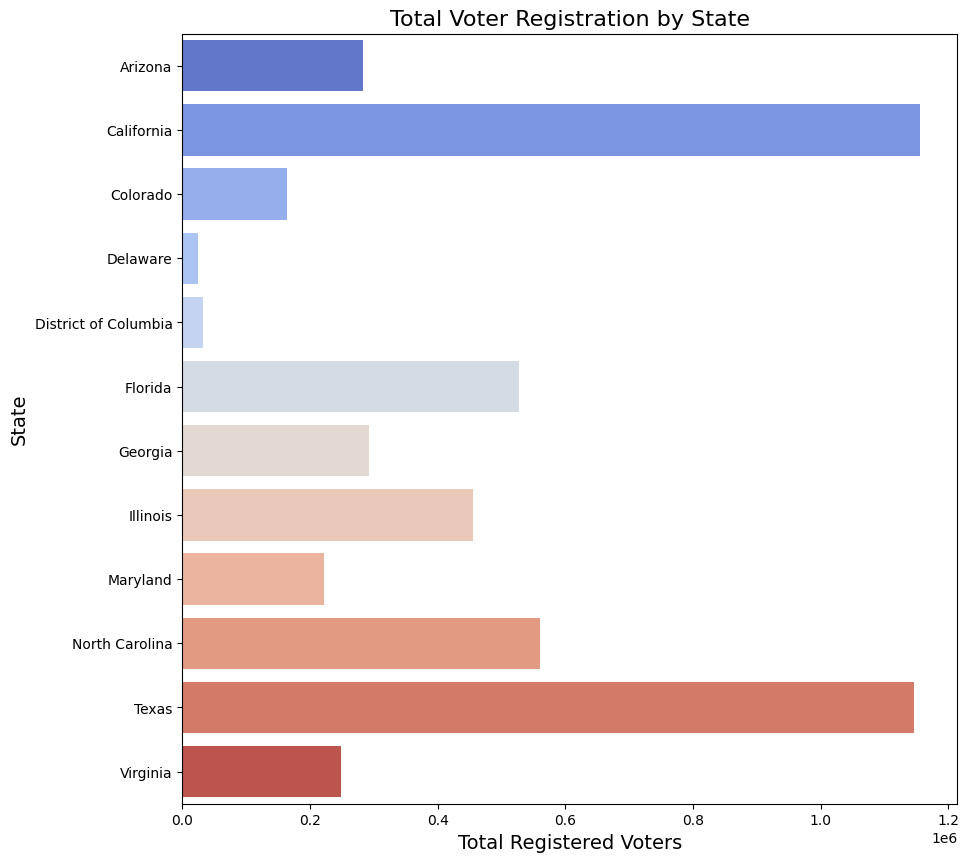

In [23]:
total_voters_by_state = voters.groupby("NAME")["registered_voters"].sum().reset_index()
plt.figure(figsize=(10, 10))
sns.barplot(x="registered_voters", y="NAME", data = total_voters_by_state, hue = "NAME", palette="coolwarm",legend=False)
plt.xlabel("Total Registered Voters", fontsize=14)
plt.ylabel("State", fontsize=14)
plt.title("Total Voter Registration by State", fontsize=16)
plt.show()

Next we will analyze a plot comparing voter registration in 2016 and 2020. When looking at this graph we can a trend of more voter registrations in 2020 than in 2016 in the months January, Feburary. However, trend ends once March begins and 2016 sees more registrations than 2020 for the rest of the months from March until May.

<function matplotlib.pyplot.show(close=None, block=None)>

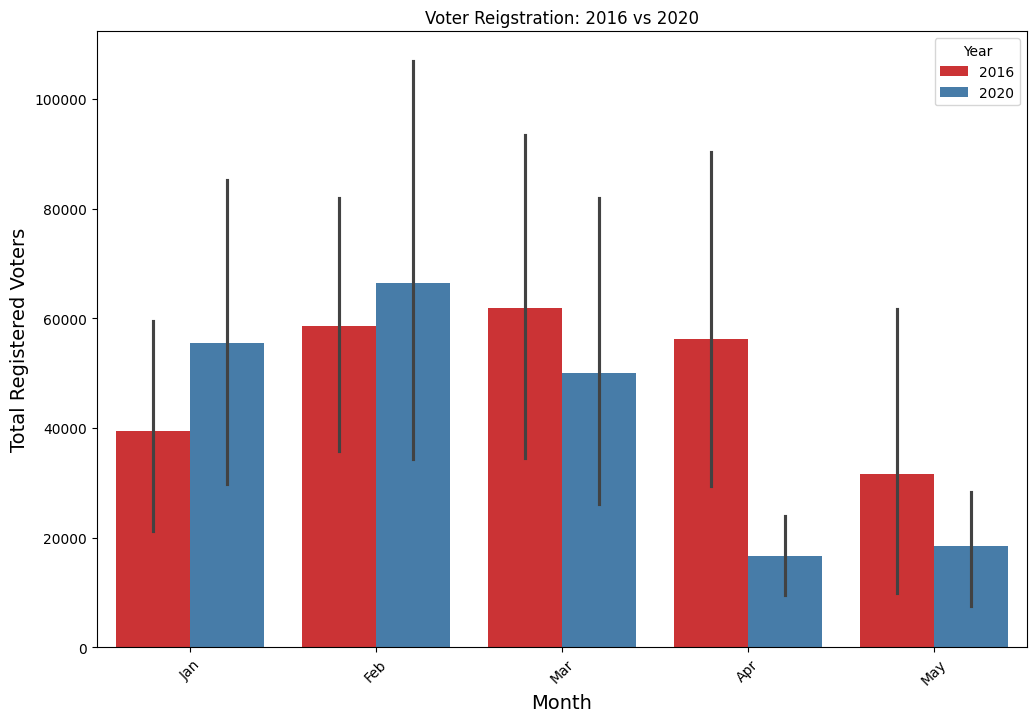

In [25]:
plt.figure(figsize=(12,8))
sns.barplot(x="Month", y="registered_voters", hue="Year",data=voters, palette="Set1")
plt.xticks(rotation=45)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Total Registered Voters", fontsize=14)
plt.title("Voter Reigstration: 2016 vs 2020")
plt.legend(title="Year")
plt.show

The bottom graph reveals the answer to our second research question. It shows that North Carolina saw the highest amount of registered voters.

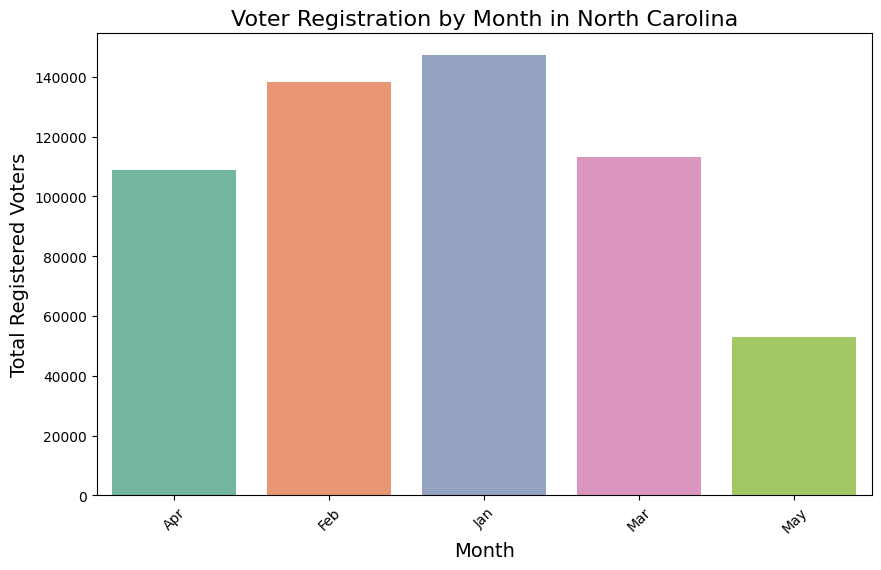

In [31]:
nc_voters = voters[voters["NAME"] == "North Carolina"]
nc_monthly_voter_registration = nc_voters.groupby("Month")["registered_voters"].sum().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x="Month", y="registered_voters", data=nc_monthly_voter_registration,hue= "Month", palette="Set2", legend=False)
plt.xticks(rotation=45)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Total Registered Voters", fontsize=14)
plt.title("Voter Registration by Month in North Carolina", fontsize=16)
plt.show()

We will begin creating in order map of the United States in order to better understand our dataframe geographically.

In [32]:
!git clone https://github.com/SFord87/325-Datasets

Cloning into '325-Datasets'...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 53 (delta 13), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (53/53), 7.37 MiB | 11.68 MiB/s, done.
Resolving deltas: 100% (13/13), done.


In [36]:
shapefile = "/content/325-Datasets/cb_2018_us_state_500k.shp"

states = gpd.read_file(shapefile)

After loading in our shape file data we must set our bounding box to the continental US.

In [34]:
minx, miny, maxx, maxy = -125, 24.396308, -66.93457, 49.384358

In [37]:
bbox = states.cx[minx:maxx, miny:maxy]

We will now create a dataframe showing the average voter registration per state. Afterwards, we merge the dataframe with the our mapping data.

In [38]:
avg_voter_registration_per_state = voters.groupby("NAME")["registered_voters"].mean().reset_index()

In [39]:
print(avg_voter_registration_per_state)

                    NAME  registered_voters
0                Arizona          35311.500
1             California         144545.375
2               Colorado          20527.500
3               Delaware           3166.375
4   District of Columbia           3248.400
5                Florida          65868.125
6                Georgia          36604.125
7               Illinois          56840.375
8               Maryland          22133.500
9         North Carolina          56040.800
10                 Texas         114610.100
11              Virginia          24845.200


In [40]:
merged_data = pd.merge(states, avg_voter_registration_per_state, on="NAME", how="inner")

In [41]:
print(merged_data.head())

  STATEFP   STATENS     AFFGEOID GEOID STUSPS            NAME LSAD  \
0      37  01027616  0400000US37    37     NC  North Carolina   00   
1      51  01779803  0400000US51    51     VA        Virginia   00   
2      12  00294478  0400000US12    12     FL         Florida   00   
3      48  01779801  0400000US48    48     TX           Texas   00   
4      06  01779778  0400000US06    06     CA      California   00   

          ALAND       AWATER  \
0  125923656064  13466071395   
1  102257717110   8528531774   
2  138949136250  31361101223   
3  676653171537  19006305260   
4  403503931312  20463871877   

                                            geometry  registered_voters  
0  MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...          56040.800  
1  MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...          24845.200  
2  MULTIPOLYGON (((-80.17628 25.52505, -80.17395 ...          65868.125  
3  MULTIPOLYGON (((-94.7183 29.72886, -94.71721 2...         114610.100  
4  MULTIPOLYGON 

Below is our resulting map which highlights the average voter registarion by state.

<Figure size 2500x1500 with 0 Axes>

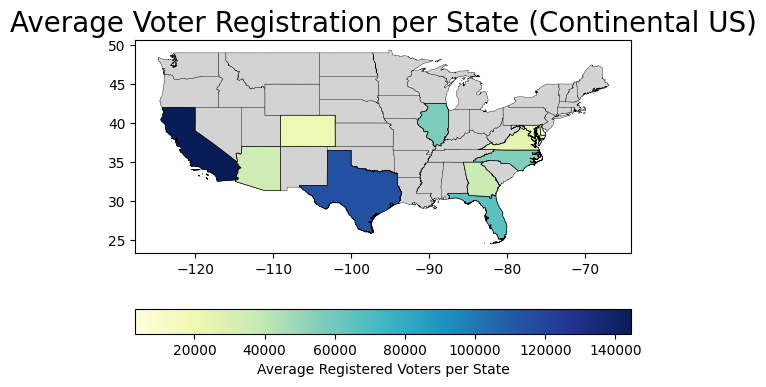

In [43]:
plt.figure(figsize=(25, 15))
bbox.plot(edgecolor='black', linewidth=0.25, color='lightgray')
merged_data.plot(column='registered_voters', cmap='YlGnBu', legend=True,
                 legend_kwds={'label': "Average Registered Voters per State",
                              'orientation': 'horizontal'},
                 ax=plt.gca(), edgecolor='black', linewidth=0.5)
plt.title("Average Voter Registration per State (Continental US)", fontsize=20)
plt.show()

# Conclusion
Insights : Our research has highlighted the trends seen voter registation in 2016 and 2020. We've gathered that more populous states tend to have higher amount of voter registration. We've also seen trends among the years 2016 and 2020. We saw 2020 have more registrations than 2016 up until March. After this, 2016 had a much greater amount of registrations than 2020, especially during April. This could be due to the political climate at the time or any major events. One major event during that could be cited as a possible cause was the COVID-19 pandemic in 2020.

Suggestions : I would suggest to bring in more data on the registration of voters from the other months. This could help us see which year had more registrations. This would be especially useful in looking into our previous conclusio about the COVID-19 pandmemic possibly being a cause to the lower numbers of registration. We could see how these numbers mightve been impacted by the pandemic if we could the see the numbers of the later months.

Possible Next Steps : If I were to continue to work on this project I would ask for the data I've described above. After getting the data, I would immediately compare the number of voter registrations between 2016 and 2020. I would then familiarize myself with the political going ons and of any major events the could have impacted these numbers. I would try to create a new dataframe that attached the titles/labels of these events to the months and years they had taken place in. I would produce another visualization that could explicitly show the months, the years, the number of registrations and any major events that happened in within the time periods. This would help to correlate the number of voter registrations to any political or major events. I feel this is important since we could better understand voter behavior and we could better predict this behaviour if another similar event were to happen.  